## **1. Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import kagglehub
import shutil

## **2. Import Dataset**

In [2]:
# Download raw dataset from Kaggle
path = kagglehub.dataset_download('fedesoriano/heart-failure-prediction')
raw_csv_path = str(path) + '/heart.csv'
shutil.copy(raw_csv_path, '../datasets/raw/ds1_kaggle_heart.csv')

'../datasets/raw/ds1_kaggle_heart.csv'

In [3]:
df = pd.read_csv('../datasets/raw/ds1_kaggle_heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## **3. Data Understanding**

Kaggle Link of dataset: [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Features Description:
- `Age`: age of the patient [years]
- `Sex`: sex of the patient [M: Male, F: Female]
- `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP`: resting blood pressure [mm/Hg]
- `Cholesterol`: serum cholesterol [mm/dl]
- `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
- `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
- `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease`: output class [1: heart disease, 0: Normal]

### **3.1 Assessing Data**

#### **A. Data Type Check**

- The data types of the features `Sex`, `FastingBS`, `ExerciseAngina`, and `HeartDisease` only have 2 unique values, so they should be converted to categorical boolean types.
- The features `ChestPainType`, `RestingECG`, and `ST_Slope` contain several unique values (classes), so they should be converted to categorical boolean types using One-Hot Encoding.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### **B. Descriptive Statistic (Numerical Features) Check**

- Anomaly: The minimum value is 0 for `Cholesterol`. Every person should have cholesterol.
- Anomaly: The minimum value is 0 for `RestingBP`. Every person should have a heartbeat even at rest.

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#### **C. Data Duplicate Check**

- No duplicate data found

In [6]:
# check for duplicate data
print(f'Total data: {df.shape[0]}')
print(f'Total duplicate data: {df.duplicated().sum()}')

Total data: 918
Total duplicate data: 0


#### **D. Missing Values Check**

- No missing values found in the data

In [7]:
print(f'Total data: {df.shape[0]}\n')
print(f'Missing Value List: \n{df.isnull().sum()}')

Total data: 918

Missing Value List: 
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


### **3.2 EDA - Univariate Analysis**

#### **A. Categorical Features**

In [8]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']

#### **1) Distribution of the `Sex` Feature**

  Sex  Sample  Percentage(%)
0   M     725           79.0
1   F     193           21.0


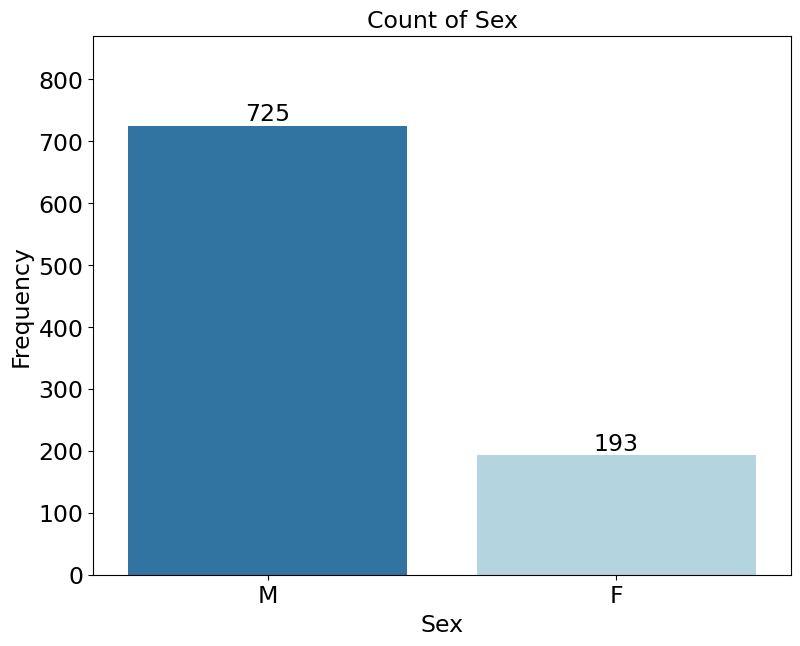

In [9]:
feature = categorical_features[0]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Sex', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={ 'M': 'tab:blue', 'F': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **2) Distribution of the `ChestPainType` Feature**

  ChestPainType  Sample  Percentage(%)
0           ASY     496           54.0
1           NAP     203           22.1
2           ATA     173           18.8
3            TA      46            5.0


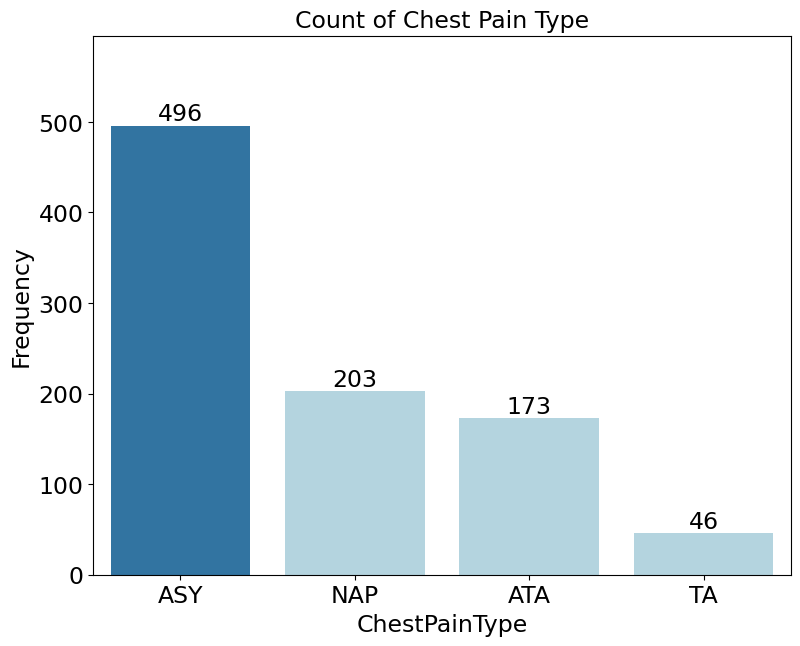

In [10]:
feature = categorical_features[1]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Chest Pain Type', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={'TA': 'lightblue', 'ATA': 'lightblue', 'NAP': 'lightblue', 'ASY': 'tab:blue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **3) Distribution of the `FastingBS` Feature**

   FastingBS  Sample  Percentage(%)
0          0     704           76.7
1          1     214           23.3


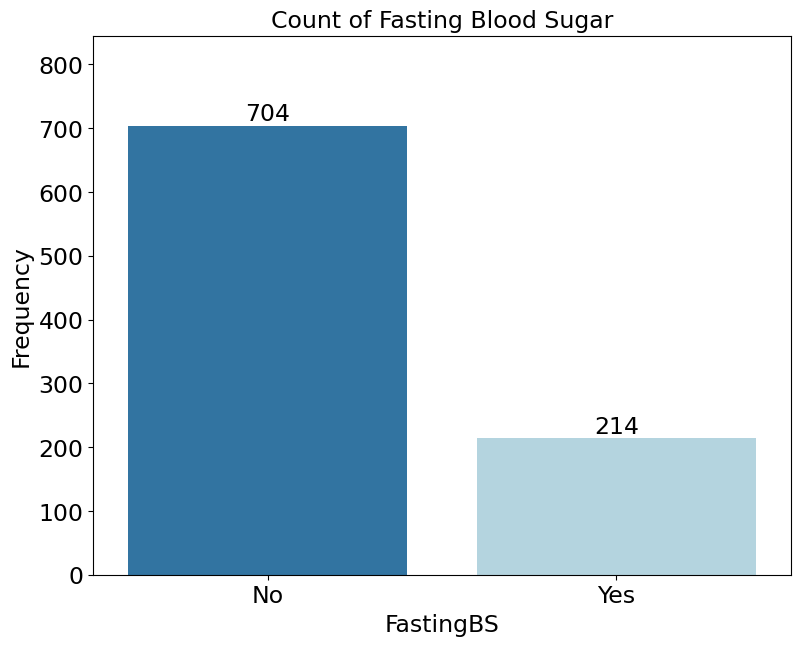

In [11]:
feature = categorical_features[2]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Fasting Blood Sugar', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={0: 'tab:blue', 1: 'lightblue'}, dodge=False, legend=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **4) Distribution of the `RestingECG` Feature**

  RestingECG  Sample  Percentage(%)
0     Normal     552           60.1
1        LVH     188           20.5
2         ST     178           19.4


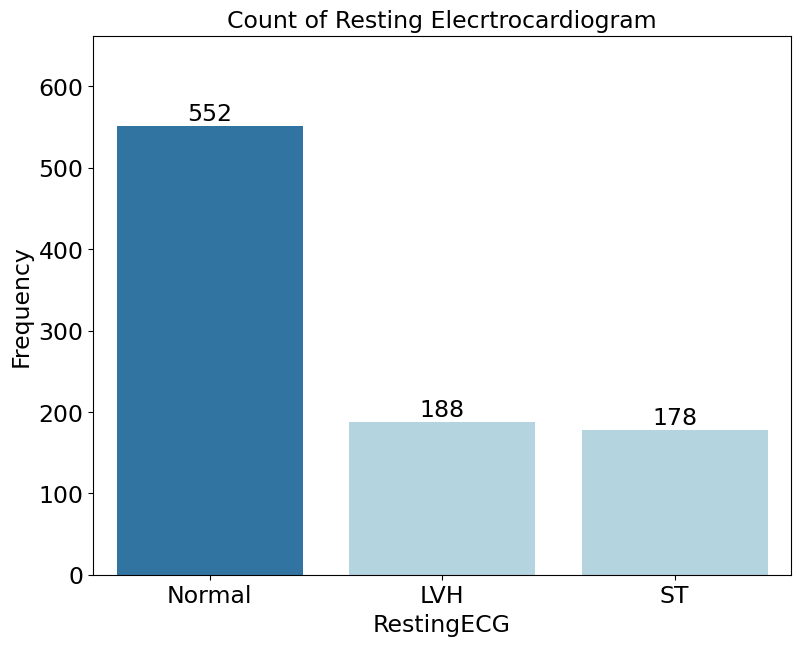

In [12]:
feature = categorical_features[3]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Resting Elecrtrocardiogram', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={'Normal': 'tab:blue', 'LVH': 'lightblue', 'ST': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **5) Distribution of the `ExerciseAngina` Feature**

  ExerciseAngina  Sample  Percentage(%)
0              N     547           59.6
1              Y     371           40.4


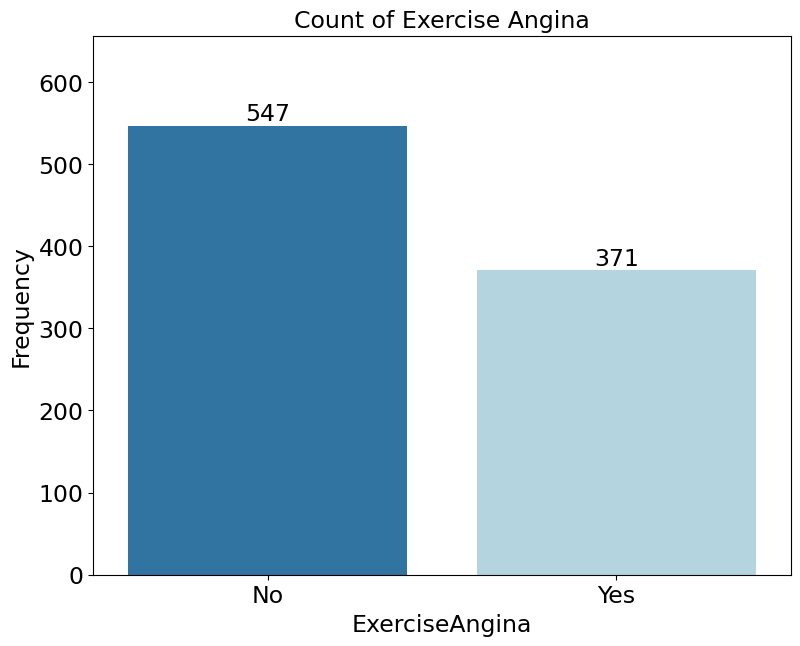

In [13]:
feature = categorical_features[4]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Exercise Angina', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={'N': 'tab:blue', 'Y': 'lightblue'}, dodge=False, legend=False)
ax.set_xticks(['N', 'Y'])
ax.set_xticklabels(['No', 'Yes'])
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **6) Distribution of the `ST_Slope` Feature**

  ST_Slope  Sample  Percentage(%)
0     Flat     460           50.1
1       Up     395           43.0
2     Down      63            6.9


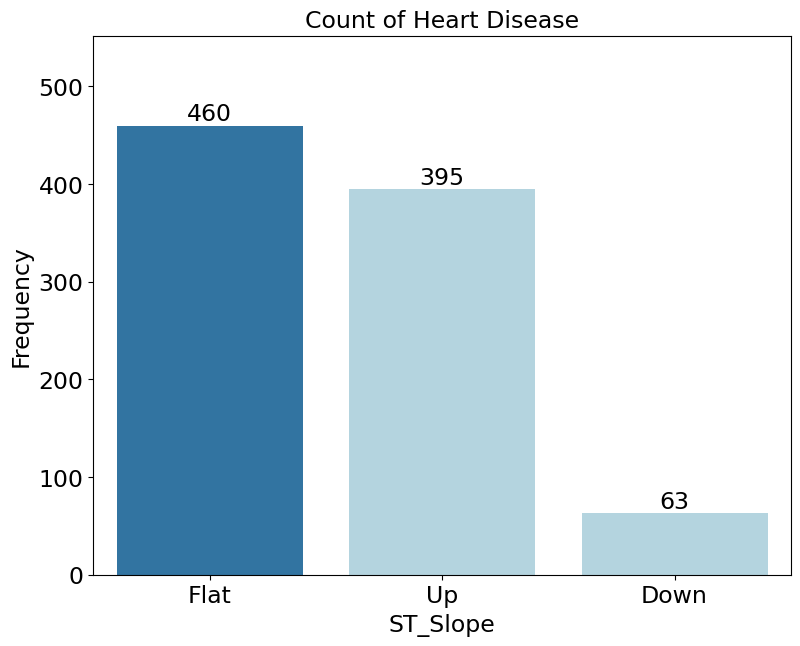

In [14]:
feature = categorical_features[5]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={'Flat': 'tab:blue', 'Up': 'lightblue', 'Down': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **7) Distribution of the `HeartDisease` Feature**

   HeartDisease  Sample  Percentage(%)
0             1     508           55.3
1             0     410           44.7


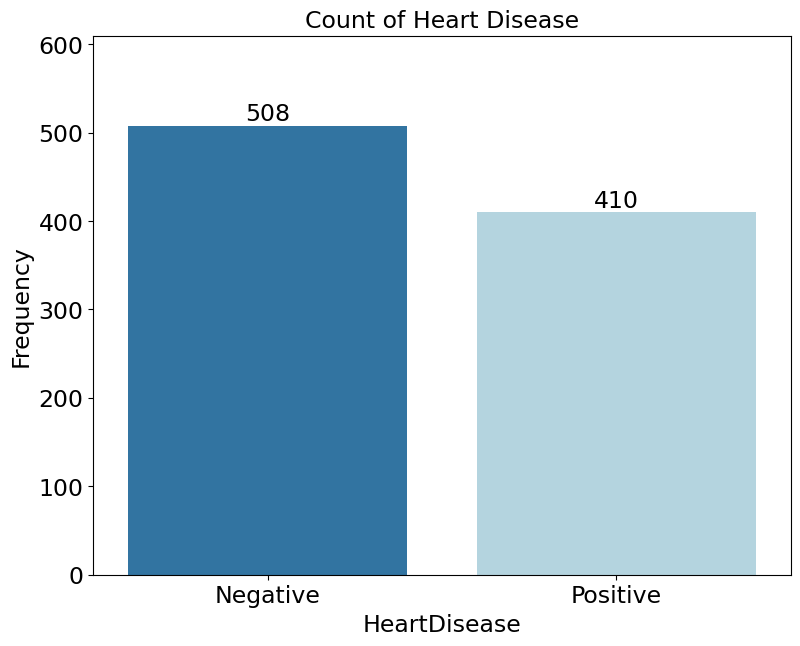

In [15]:
feature = categorical_features[6]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={0: 'lightblue', 1: 'tab:blue'}, dodge=False, legend=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **8) Distribution of the `ST_Slope` Feature**

  ST_Slope  Sample  Percentage(%)
0     Flat     460           50.1
1       Up     395           43.0
2     Down      63            6.9


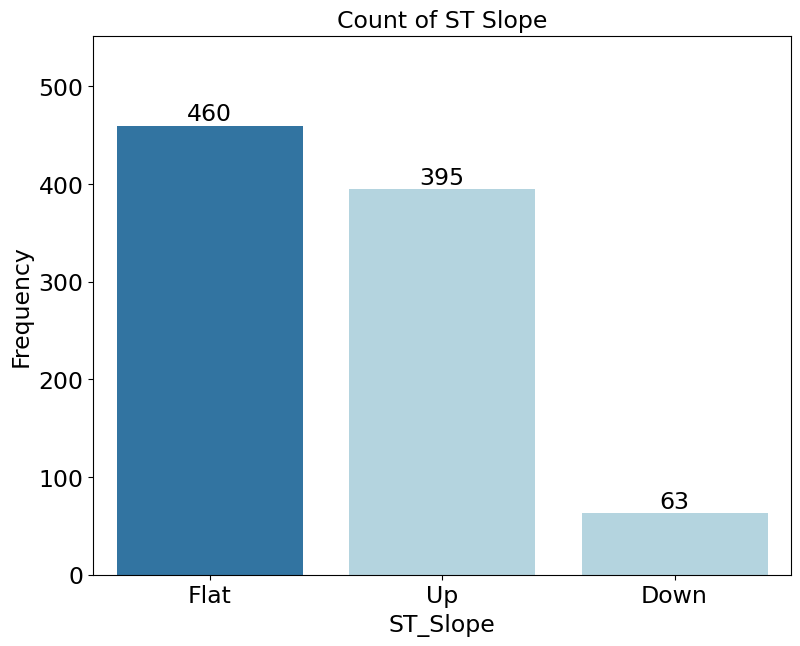

In [16]:
feature = categorical_features[5]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of ST Slope', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={'Flat': 'tab:blue', 'Up': 'lightblue', 'Down': 'lightblue'}, dodge=False, legend=False)
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **B. Numerical Features**

In [17]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

#### **1) Distribution of the `Age` Feature**

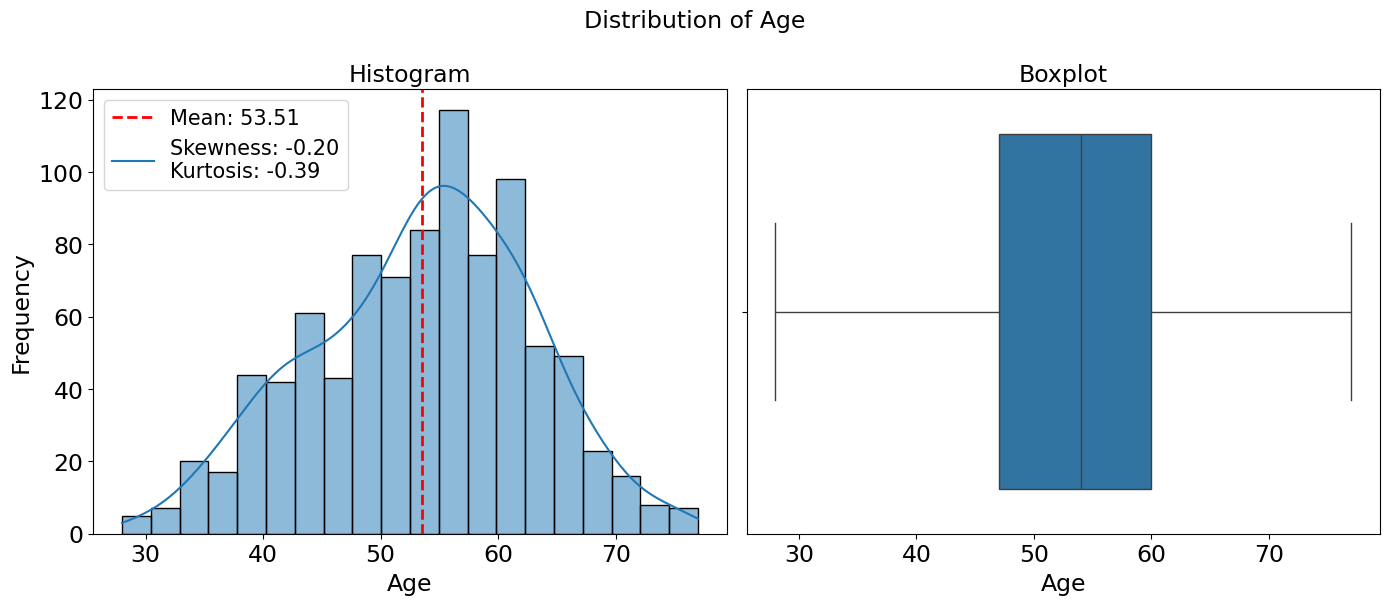

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Age', fontsize=17, y=1.001) 

mean = df['Age'].mean()
kurt = kurtosis(df['Age'])
skewness = skew(df['Age'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df, x='Age', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('Age', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df, x='Age', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('Age', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()


#### **2) Distribution of the `RestingBP` Feature**

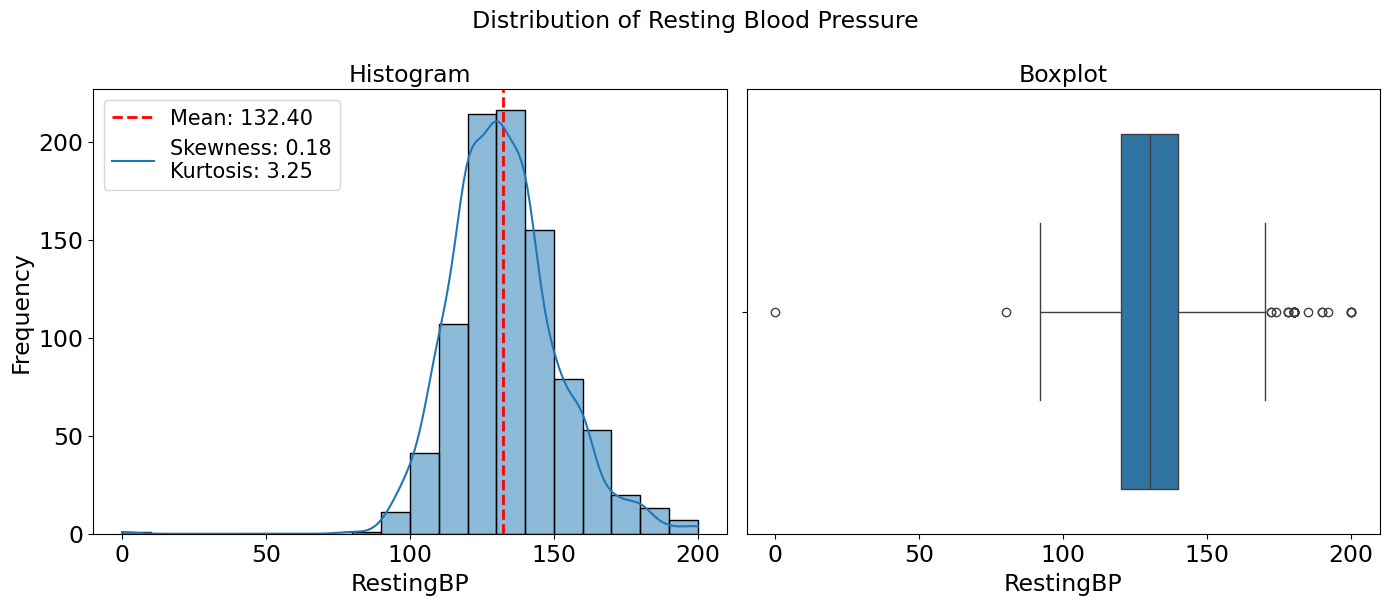

In [19]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Resting Blood Pressure', fontsize=17, y=1.001)

mean = df['RestingBP'].mean()
kurt = kurtosis(df['RestingBP'])
skewness = skew(df['RestingBP'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df, x='RestingBP', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('RestingBP', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df, x='RestingBP', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('RestingBP', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()


#### **3) Distribution of the `Cholesterol` Feature**

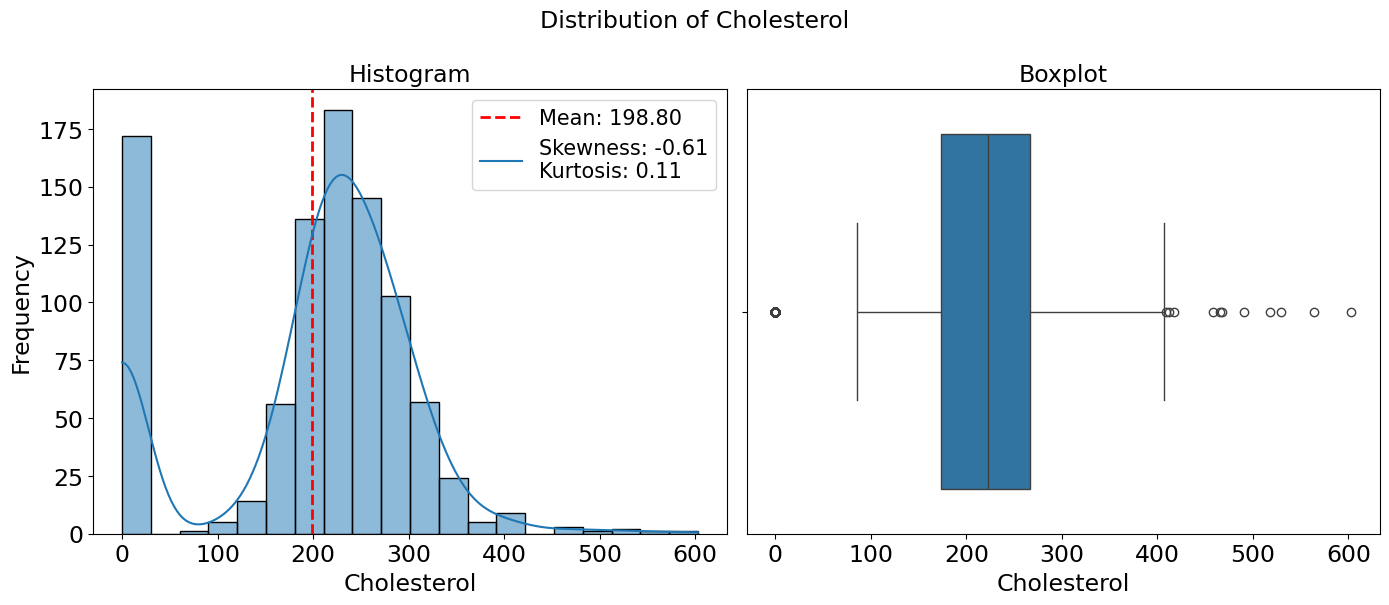

In [20]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Cholesterol', fontsize=17, y=1.001)

mean = df['Cholesterol'].mean()
kurt = kurtosis(df['Cholesterol'])
skewness = skew(df['Cholesterol'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df, x='Cholesterol', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('Cholesterol', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper right')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df, x='Cholesterol', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('Cholesterol', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()


#### **4) Distribution of the `MaxHR` Feature**

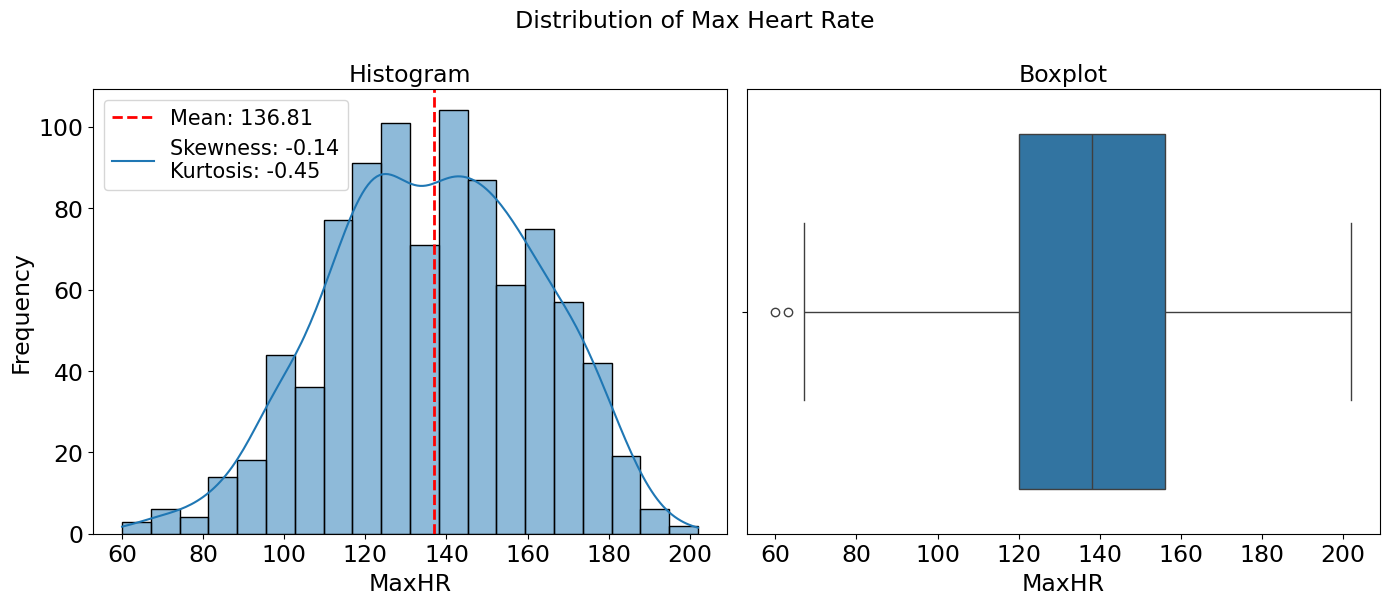

In [21]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Max Heart Rate', fontsize=17, y=1.001)

mean = df['MaxHR'].mean()
kurt = kurtosis(df['MaxHR'])
skewness = skew(df['MaxHR'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df, x='MaxHR', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('MaxHR', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper left')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df, x='MaxHR', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('MaxHR', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)

plt.tight_layout()
plt.show()


#### **5) Distribution of the `Oldpeak` Feature**

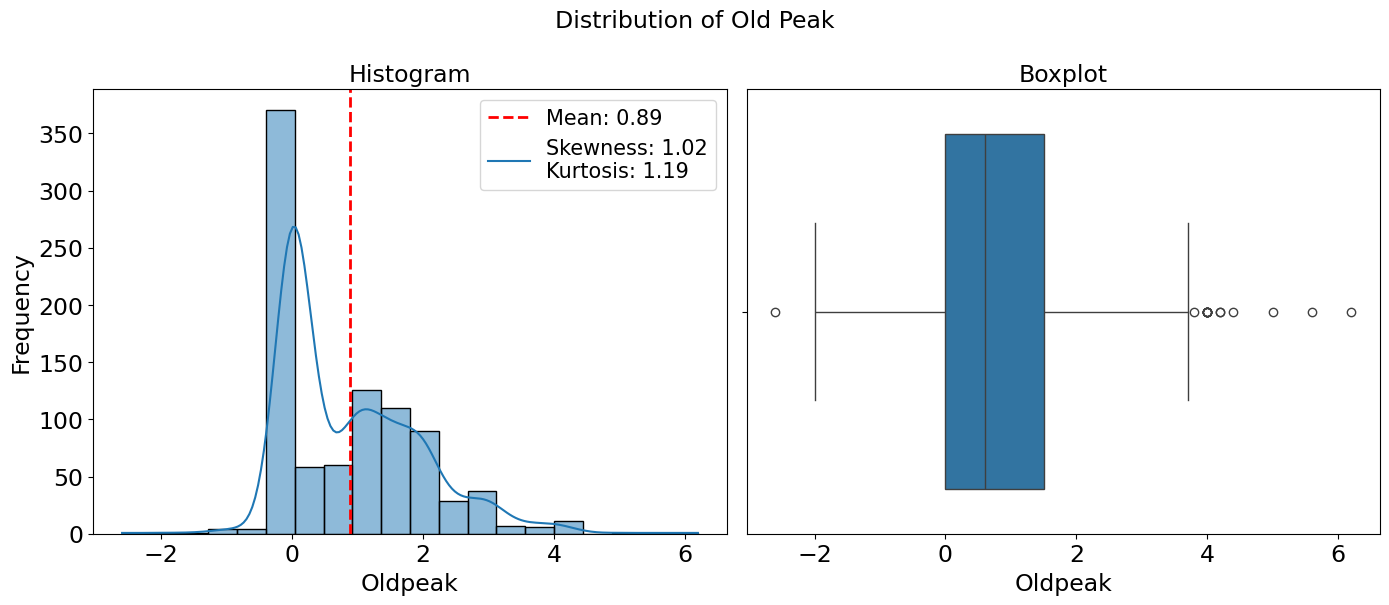

In [22]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Distribution of Old Peak', fontsize=17, y=1.001)

mean = df['Oldpeak'].mean()
kurt = kurtosis(df['Oldpeak'])
skewness = skew(df['Oldpeak'])
axes[0].axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean:.2f}')
sns.histplot(data=df, x='Oldpeak', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram', fontsize=17)
axes[0].set_xlabel('Oldpeak', fontsize=17)
axes[0].set_ylabel('Frequency', fontsize=17)
axes[0].legend(labels=[f'Mean: {mean:.2f}',f'Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}'], fontsize=15, loc='upper right')
axes[0].tick_params(axis='x', labelsize=17)
axes[0].tick_params(axis='y', labelsize=17)

sns.boxplot(data=df, x='Oldpeak', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=17)
axes[1].set_xlabel('Oldpeak', fontsize=17)
axes[1].tick_params(axis='x', labelsize=17)


plt.tight_layout()
plt.show()


### **3.3 EDA - Multivariate Analysis**

#### **A. Categorical Features**

#### **1) Distribution of the `Sex` Feature by `HeartDisease`**

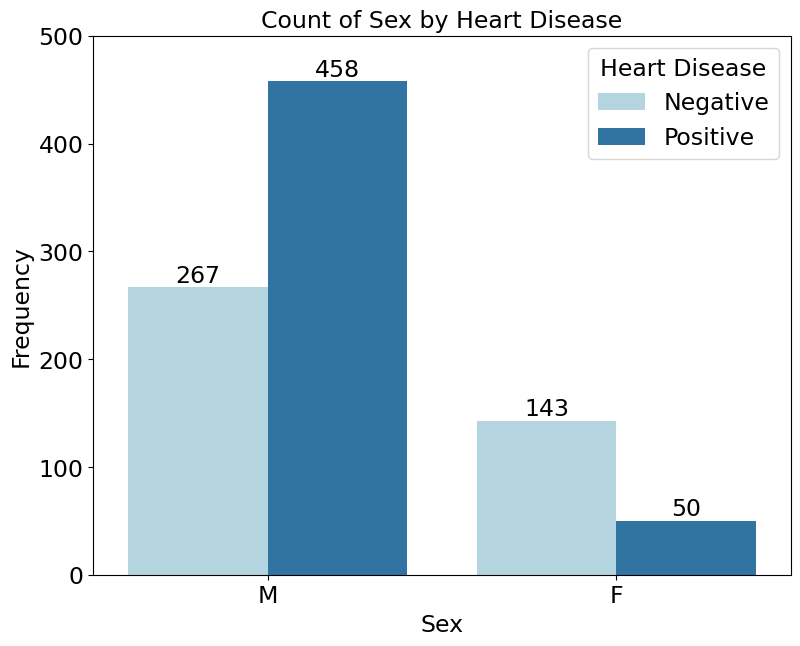

In [23]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='Sex', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Sex by Heart Disease', fontsize=17)
plt.xlabel('Sex', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 500)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right', fontsize=17, title_fontsize=17)


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()


#### **2) Distribution of the `ChestPainType` Feature by `HeartDisease`**

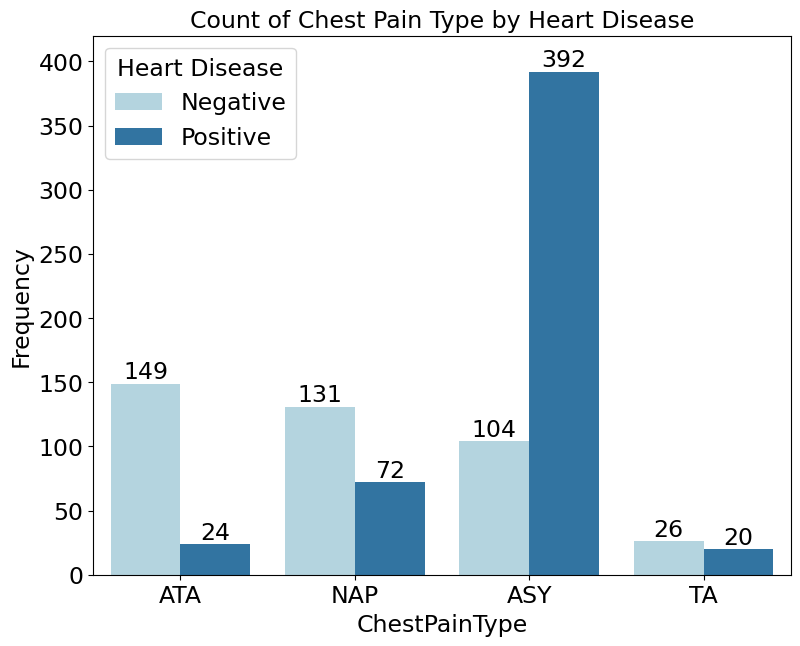

In [24]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Chest Pain Type by Heart Disease', fontsize=17)
plt.xlabel('ChestPainType', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 420)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper left', fontsize=17, title_fontsize=17)


for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **3) Distribution of the `FastingBS` Feature by `HeartDisease`**

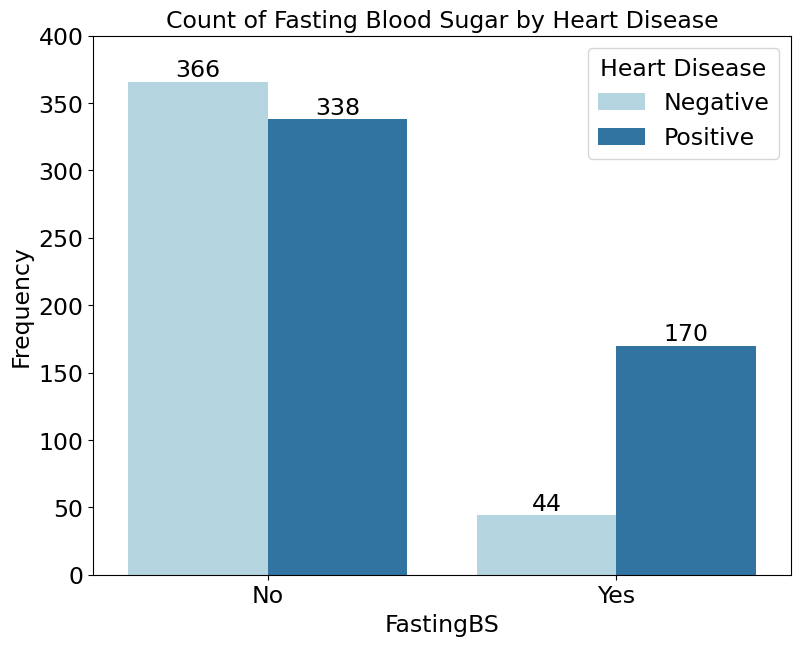

In [25]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='FastingBS', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
plt.title('Count of Fasting Blood Sugar by Heart Disease', fontsize=17)
plt.xlabel('FastingBS', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 400)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **4) Distribution of the `RestingECG` Feature by `HeartDisease`**

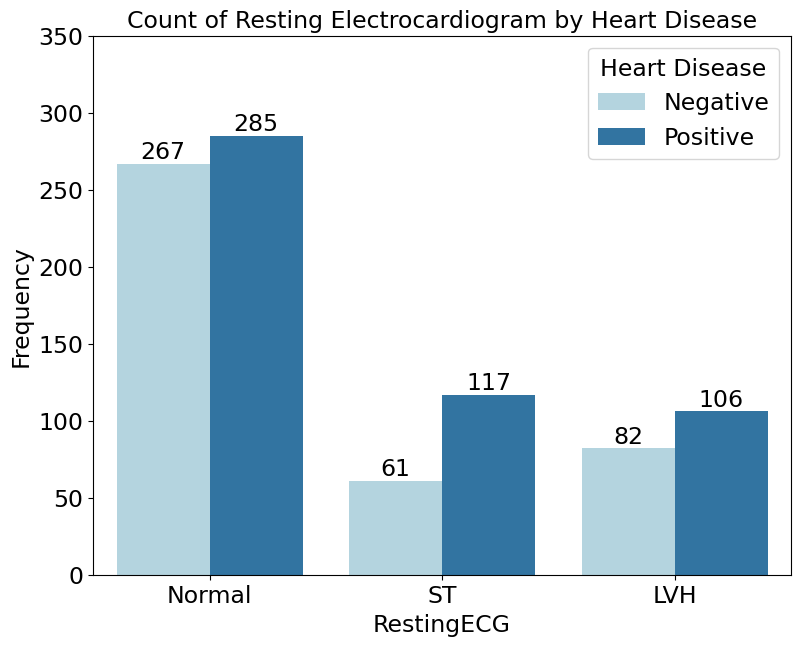

In [26]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='RestingECG', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of Resting Electrocardiogram by Heart Disease', fontsize=17)
plt.xlabel('RestingECG', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 350)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **5) Distribution of the `ExerciseAngina` Feature by `HeartDisease`**

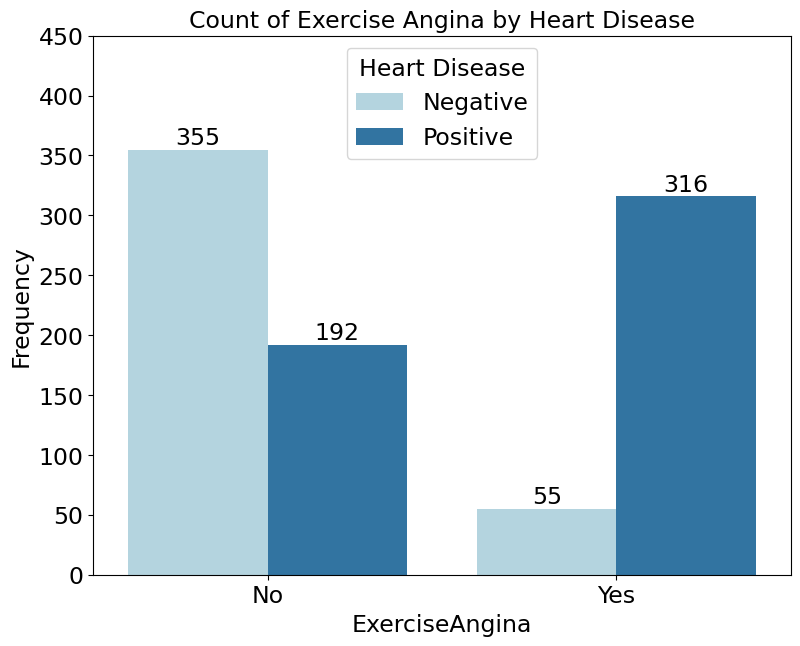

In [27]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_xticks(['N', 'Y'])
ax.set_xticklabels(['No', 'Yes'])
plt.title('Count of Exercise Angina by Heart Disease', fontsize=17)
plt.xlabel('ExerciseAngina', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 450)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper center', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **6) Distribution of the `ST_Slope` Feature by `HeartDisease`**

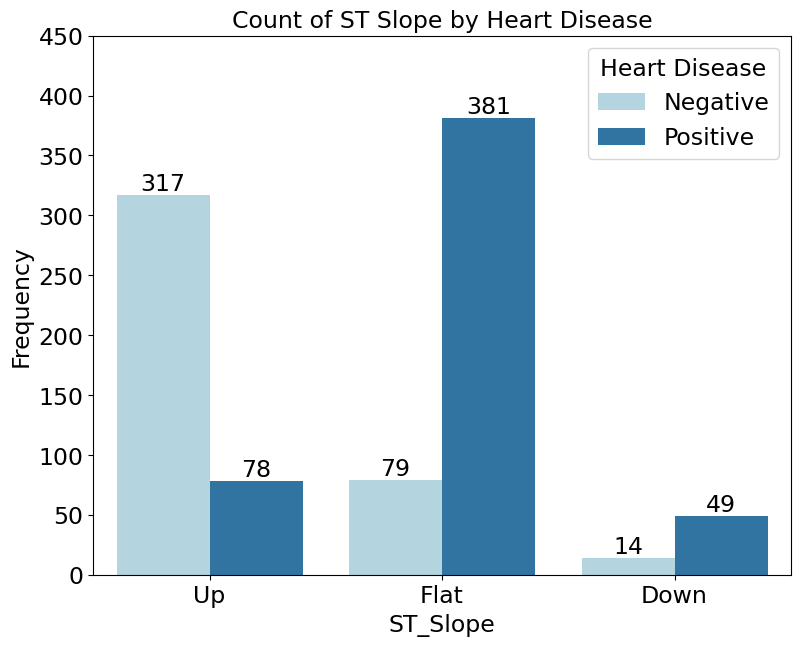

In [28]:
plt.figure(figsize=(9, 7))
ax = sns.countplot(data=df, x='ST_Slope', hue='HeartDisease', palette={0: 'lightblue', 1: 'tab:blue'})
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
plt.title('Count of ST Slope by Heart Disease', fontsize=17)
plt.xlabel('ST_Slope', fontsize=17)
plt.ylabel('Frequency', fontsize=17)
plt.ylim(0, 450)
plt.legend(title='Heart Disease', labels=['Negative', 'Positive'], loc='upper right', fontsize=17, title_fontsize=17)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

#### **B. Numerical Features**

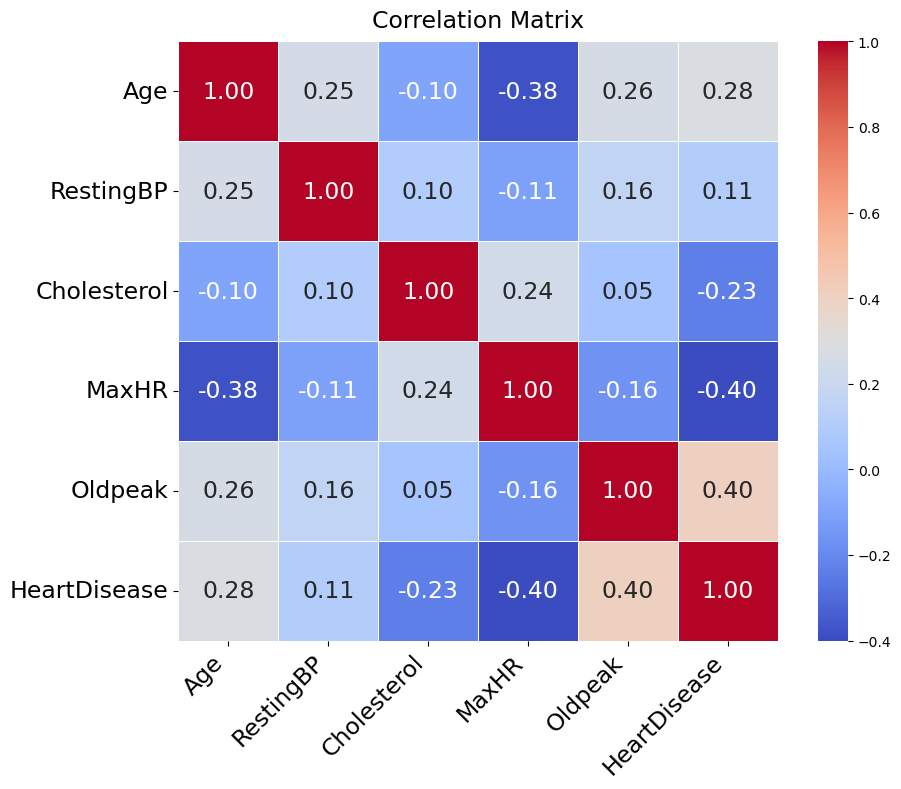

In [29]:
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix', fontsize=17, y=1.01)
numeric_df = df[numerical_features + ['HeartDisease']]
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 17})
plt.xticks(rotation=45, ha='right', fontsize=17)
plt.yticks(rotation=0, fontsize=17)
plt.tight_layout()
plt.show()

## **4. Data Cleaning**

#### **4.1 Change Data Type**

In [30]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0}).astype(bool)
df['FastingBS'] = df['FastingBS'].astype(bool)
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0}).astype(bool)
df['HeartDisease'] = df['HeartDisease'].astype(bool)

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,True,ATA,140,289,False,Normal,172,False,0.0,Up,False
1,49,False,NAP,160,180,False,Normal,156,False,1.0,Flat,True
2,37,True,ATA,130,283,False,ST,98,False,0.0,Up,False
3,48,False,ASY,138,214,False,Normal,108,True,1.5,Flat,True
4,54,True,NAP,150,195,False,Normal,122,False,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,True,TA,110,264,False,Normal,132,False,1.2,Flat,True
914,68,True,ASY,144,193,True,Normal,141,False,3.4,Flat,True
915,57,True,ASY,130,131,False,Normal,115,True,1.2,Flat,True
916,57,False,ATA,130,236,False,LVH,174,False,0.0,Flat,True


#### **4.2 Remove Anomali**

In [31]:
# Remove rows where Cholesterol or RestingBP is 0. Every person should have cholesterol and a heartbeat even at rest.
df = df[(df['Cholesterol'] != 0) & (df['RestingBP'] != 0)]

df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,True,ATA,140,289,False,Normal,172,False,0.0,Up,False
1,49,False,NAP,160,180,False,Normal,156,False,1.0,Flat,True
2,37,True,ATA,130,283,False,ST,98,False,0.0,Up,False
3,48,False,ASY,138,214,False,Normal,108,True,1.5,Flat,True
4,54,True,NAP,150,195,False,Normal,122,False,0.0,Up,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,True,TA,110,264,False,Normal,132,False,1.2,Flat,True
914,68,True,ASY,144,193,True,Normal,141,False,3.4,Flat,True
915,57,True,ASY,130,131,False,Normal,115,True,1.2,Flat,True
916,57,False,ATA,130,236,False,LVH,174,False,0.0,Flat,True


## **5. Feature Engineering**

#### **5.1 Dummy Encoding**

In [32]:
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)
df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,True,140,289,False,172,False,0.0,False,True,False,False,True,False,False,True
1,49,False,160,180,False,156,False,1.0,True,False,True,False,True,False,True,False
2,37,True,130,283,False,98,False,0.0,False,True,False,False,False,True,False,True
3,48,False,138,214,False,108,True,1.5,True,False,False,False,True,False,True,False
4,54,True,150,195,False,122,False,0.0,False,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,True,110,264,False,132,False,1.2,True,False,False,True,True,False,True,False
914,68,True,144,193,True,141,False,3.4,True,False,False,False,True,False,True,False
915,57,True,130,131,False,115,True,1.2,True,False,False,False,True,False,True,False
916,57,False,130,236,False,174,False,0.0,True,True,False,False,False,False,True,False


#### **5.2 High Correlation Feature Combination**

1) `Sex(Male)` with `ST_Slope_Flat` = `Male_ST_Slope_Flat`
2) `ChestPainType_ASY` with `ST_Slope_Flat` = `ChestPainType_ASY_ST_Slope_Flat`
3) `Sex(Male)` with `ChestPainType_ASY` = `Male_ChestPainType_ASY`

In [33]:
df['Male_ST_Slope_Flat'] = df['Sex'] & df['ST_Slope_Flat']
df['ChestPainType_ASY_ST_Slope_Flat'] = (df['ST_Slope_Flat'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
df['Male_ChestPainType_ASY'] = (df['Sex'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['ExerciseAngina_ST_Slope_Up'] = (~df['ExerciseAngina'] & df['ST_Slope_Up'])

df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Male_ST_Slope_Flat,ChestPainType_ASY_ST_Slope_Flat,Male_ChestPainType_ASY
0,40,True,140,289,False,172,False,0.0,False,True,False,False,True,False,False,True,False,False,False
1,49,False,160,180,False,156,False,1.0,True,False,True,False,True,False,True,False,False,False,False
2,37,True,130,283,False,98,False,0.0,False,True,False,False,False,True,False,True,False,False,False
3,48,False,138,214,False,108,True,1.5,True,False,False,False,True,False,True,False,False,True,False
4,54,True,150,195,False,122,False,0.0,False,False,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,True,110,264,False,132,False,1.2,True,False,False,True,True,False,True,False,True,False,False
914,68,True,144,193,True,141,False,3.4,True,False,False,False,True,False,True,False,True,True,True
915,57,True,130,131,False,115,True,1.2,True,False,False,False,True,False,True,False,True,True,True
916,57,False,130,236,False,174,False,0.0,True,True,False,False,False,False,True,False,False,False,False


In [34]:
# df['ExerciseAngina_FastingBS'] = (df['ExerciseAngina'] & df['FastingBS'])
# df['ExerciseAngina_St_Slope_Flat'] = (df['ExerciseAngina'] & df['ST_Slope_Flat'])
# df['ExerciseAngina_ChestPainType_ASY'] = (df['ExerciseAngina'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['ChestPainType_ASY_FastingBS'] = (df['FastingBS'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['ChestPainType_ASY_ST_Slope_Flat'] = (df['ST_Slope_Flat'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['FastingBS_ST_Slope_Flat'] = (df['FastingBS'] & df['ST_Slope_Flat'])

# df

In [35]:
# df['Male_ExerciseAngina']= (df['Sex'] & df['ExerciseAngina'])
# df['ExerciseAngina_St_Slope_Flat'] = (df['ExerciseAngina'] & df['ST_Slope_Flat'])
# df['ExerciseAngina_ChestPainType_ASY'] = (df['ExerciseAngina'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['ChestPainType_ASY_ST_Slope_Flat'] = (df['ST_Slope_Flat'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])

# df

In [36]:
# df['Male_ST_Slope_Flat'] = df['Sex'] & df['ST_Slope_Flat']
# df['ChestPainType_ASY_ST_Slope_Flat'] = (df['ST_Slope_Flat'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['Male_ChestPainType_ASY'] = (df['Sex'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])
# df['Male_ExerciseAngina']= (df['Sex'] & df['ExerciseAngina'])
# df['ExerciseAngina_St_Slope_Flat'] = (df['ExerciseAngina'] & df['ST_Slope_Flat'])
# df['ExerciseAngina_ChestPainType_ASY'] = (df['ExerciseAngina'] & ~df['ChestPainType_NAP'] & ~df['ChestPainType_TA'] & ~df['ChestPainType_ATA'])

# df

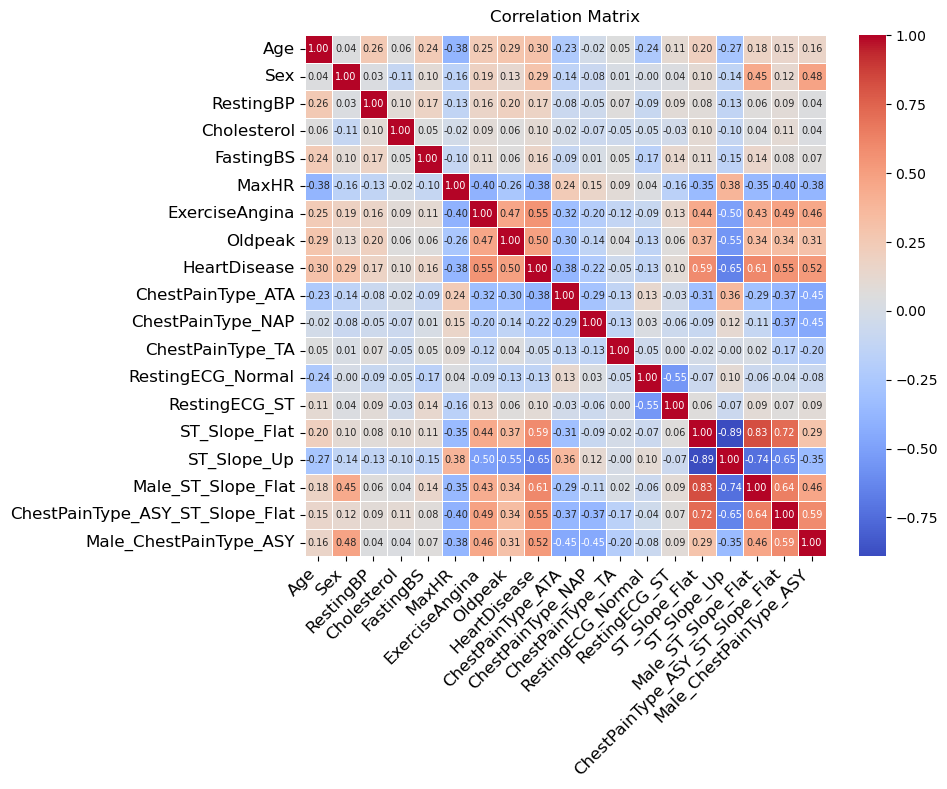

In [37]:
df.corr()['HeartDisease'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix', fontsize=12, y=1.01)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

#### **5.3 Remove Low Correlation Features (-0.1 < x < 0.1)**

In [38]:
low_corr_columns = df.corr()['HeartDisease'][(df.corr()['HeartDisease'] > -0.1) & (df.corr()['HeartDisease'] < 0.1)].index
df.drop(columns=low_corr_columns, inplace=True)

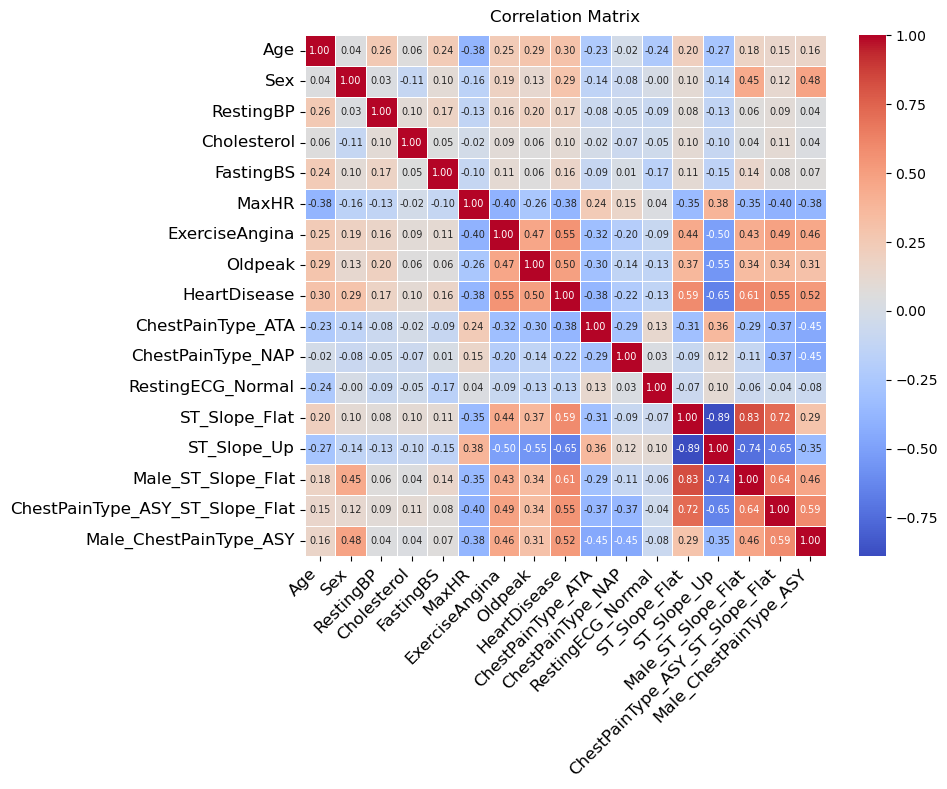

In [39]:
df.corr()['HeartDisease'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix', fontsize=12, y=1.01)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5, annot_kws={"size": 7})
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

   HeartDisease  Sample  Percentage(%)
0         False     390           52.3
1          True     356           47.7


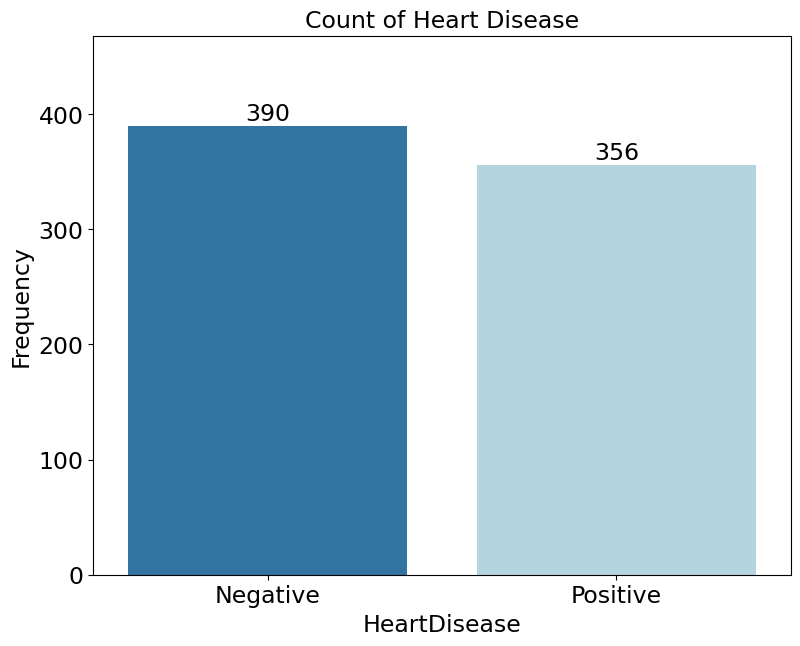

In [40]:
feature = categorical_features[6]
summary_df = df[feature].value_counts().rename_axis(feature).reset_index(name='Sample')
summary_df['Percentage(%)'] = (summary_df['Sample'] / len(df) * 100).round(1)
print(summary_df)

plt.figure(figsize=(9, 7))
plt.title(f'Count of Heart Disease', fontsize=17)
ax = sns.countplot(data=df, x=feature, hue=feature, order=summary_df[feature], palette={True: 'lightblue', False: 'tab:blue'}, dodge=False, legend=False)
ax.set_xticks([False, True])
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_xlabel(feature, fontsize=17)
ax.set_ylabel('Frequency', fontsize=17)
ax.tick_params(axis='x', labelsize=17)
ax.tick_params(axis='y', labelsize=17)
ax.set_ylim(0, df[feature].value_counts().max() * 1.2)

for p in ax.patches:
    if p.get_height() > 0: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=17)

plt.show()

## **6. Export Cleaned Dataset**

In [41]:
export_path = '../datasets/processed/ds1_kaggle_heart_clean.csv'
df.to_csv(export_path, index=False)